<a href="https://colab.research.google.com/github/sunspai1/ML_Code_Practise/blob/main/HD_PREDICTION_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING HEART DISEASE FROM CLINICAL AND LABORATORIAL DATA USING KNN**

## **INTRODUCTION**

Importations:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

Loading the dataset:

In [6]:
data = pd.read_csv('/heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape:

In [7]:
data.shape

(303, 14)

Variables types:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## **EDA AND PRE-PROCESSING**




### Outcome variable count:

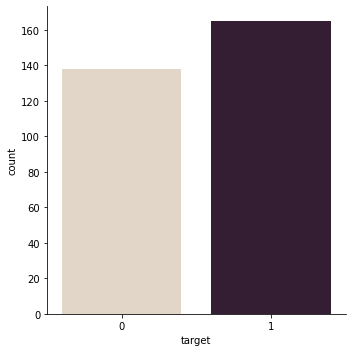

In [13]:
sns.catplot(x='target',kind='count',palette='ch:.25',data=data)

### Categorical predictive variables:

sex:

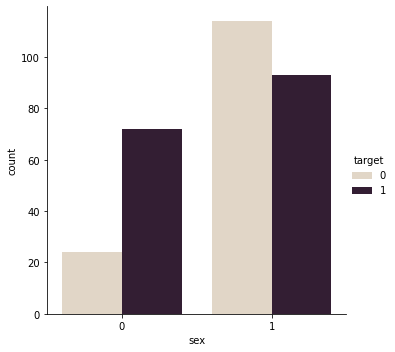

In [14]:
sns.catplot(x='sex',kind='count',hue='target',data=data,palette='ch:.25')

cp:

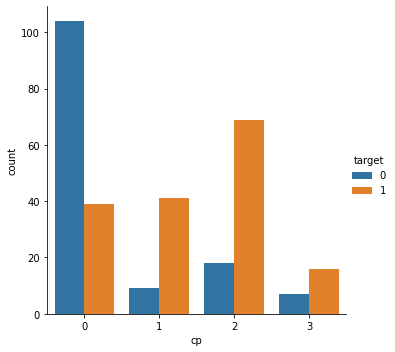

In [15]:
sns.catplot(x='cp',kind='count',hue='target',data=data)

fbs:

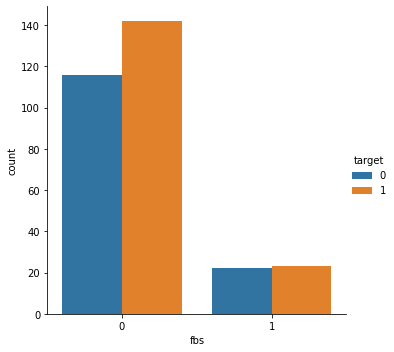

In [17]:
sns.catplot(data=data,x='fbs',kind='count',hue='target')

restecg:

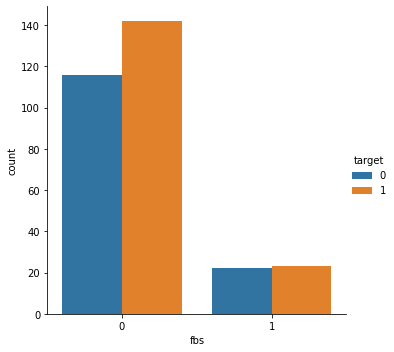

In [ ]:
sns.catplot(data=data,x='fbs',kind='count',hue='target')

exang:

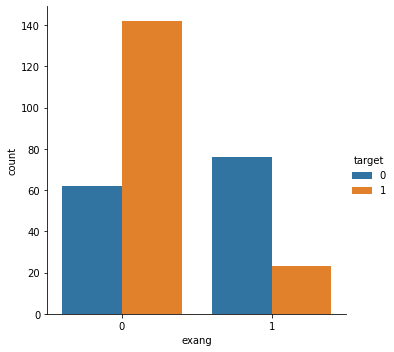

In [18]:
sns.catplot(data=data,x='exang',kind='count',hue='target')

slope:

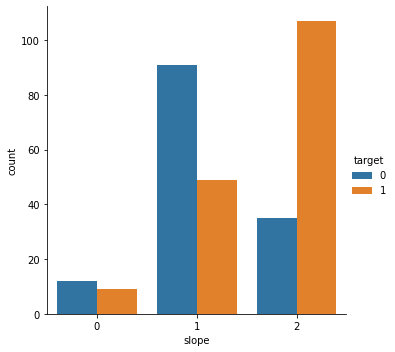

In [19]:
sns.catplot(data=data,x='slope',kind='count',hue='target')

ca:

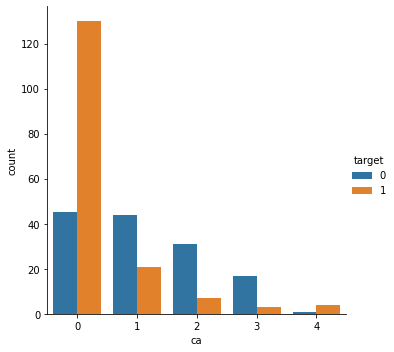

In [20]:

sns.catplot(x='ca',kind='count',data=data,hue='target')

thal:

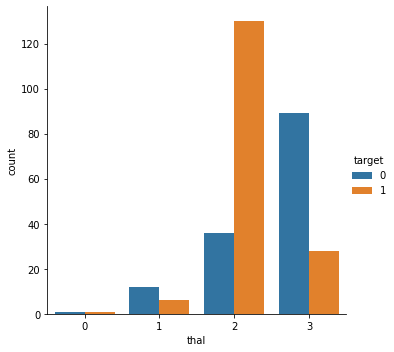

In [21]:
sns.catplot(kind='count',x='thal',data=data,hue='target')

### Distributional predictive variables:




In [22]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [25]:
data.groupby('target').describe().T

target               0           1
age  count  138.000000  165.000000
     mean    56.601449   52.496970
     std      7.962082    9.550651
     min     35.000000   29.000000
     25%     52.000000   44.000000
...                ...         ...
thal min      0.000000    0.000000
     25%      2.000000    2.000000
     50%      3.000000    2.000000
     75%      3.000000    2.000000
     max      3.000000    3.000000

[104 rows x 2 columns]

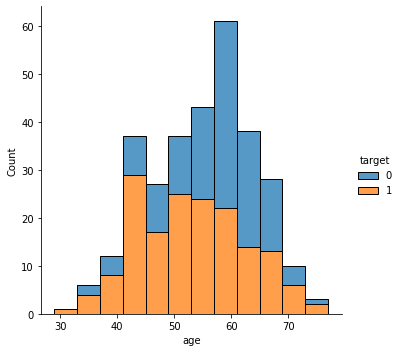

In [27]:
sns.displot(x='age',multiple='stack',hue='target',data=data)

## **SPLITTING AND PRE-PROCESSING:**

Defining x_train, x_test, y_train and y_test:

In [28]:
x = data.drop('target',axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Scaling the data:

In [30]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## **TRAINING THE MODEL:**

Parameters for grid search:

In [31]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance']}

Fiting training data and grid searching:

In [32]:
grid = GridSearchCV(knn,parameters,cv=4,scoring='accuracy')
grid.fit(x_train,y_train)



GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Displayng best parameters:

In [33]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


Picking the best model:

In [35]:
model = grid.best_estimator_

## **EVALUATING THE MODEL:**

Model score on test data:

In [36]:
model.score(x_test, y_test)

0.9016393442622951

Confusion matrix:

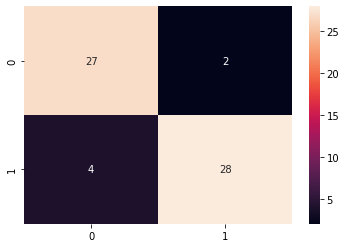

In [37]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

Calculating sensitivity, specificity, PPV and NPV:

In [ ]:
TP = 
FP = 
TN = 
FN = 
sensitivity = 
specificity = 
ppv = 
npv = 


Printing sensitivity, specificity, PPV and NPV:

In [ ]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

AUC score:

In [ ]:
probs = model
auc = 
print(auc)

ROC curve:

In [ ]:
fpr, tpr, _ = 
plt.figure()
plt.grid()
plt.plot()
plt.plot([0, 1], [0, 1])
plt.show()